In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('sales_data.csv', encoding='unicode_escape')

lets start with "Data Preprocessing" (Cleaning)
*   Remove Duplicated Rows in exists
*   Remove unnecessary columns
*   Remove Null Values if exists
*   Check column names Formatting / DataType



In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
sales['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [6]:
sales.duplicated().sum()
print('There are ', sales.duplicated().sum(), ' rows duplicate')

There are  0  rows duplicate


In [7]:
isnull=pd.DataFrame(sales.isnull().sum())
isnull.style.background_gradient(cmap='Blues')

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [8]:
sales.drop(columns = ['ORDERLINENUMBER','PHONE','ADDRESSLINE1', 'ADDRESSLINE2','MSRP','POSTALCODE',
                      'CONTACTLASTNAME', 'CONTACTFIRSTNAME','STATE' ],inplace = True)

In [9]:
isnull=pd.DataFrame(sales.isnull().sum())
isnull.style.background_gradient(cmap='Blues')

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0
PRODUCTLINE,0


In [10]:
null_territory_rows= sales[(sales['COUNTRY'] == 'USA') & (sales['TERRITORY'].isna())]
null_territory_rows[['COUNTRY', 'TERRITORY']]

,COUNTRY,TERRITORY
0,USA,NaN
3,USA,NaN
4,USA,NaN
5,USA,NaN
8,USA,NaN
...,...,...
2804,USA,NaN
2807,USA,NaN
2809,USA,NaN
2817,USA,NaN


In [11]:
Null_territory = sales[sales['TERRITORY'].isna()]['COUNTRY']
Null_territory.unique()

array(['USA', 'Canada'], dtype=object)

In [12]:
sales['TERRITORY'].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [13]:
sales.fillna({'TERRITORY':'USA'},inplace = True )

In [14]:
isnull=pd.DataFrame(sales.isnull().sum())
isnull.style.background_gradient(cmap='Blues')

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0
PRODUCTLINE,0


In [15]:
sales.rename(columns= {'ORDERNUMBER':'Order_Number', 'QUANTITYORDERED':'Quantity_Ordered','PRICEEACH':'Product_Price', 'ORDERDATE':'Order_Date', 'PRODUCTLINE':'Product_Line', 'PRODUCTCODE':'Product_Code', 'CUSTOMERNAME':'Customer_Name',
                       'STATUS':'Status', 'CITY':'City','STATE':'State', 'TERRITORY':'Territory', 'DEALSIZE':'Deal_Size',
                      'MONTH_ID': 'Month_ID','COUNTRY': 'Country', 'SALES': 'Sales','YEAR_ID': 'Year_ID'}, inplace=True)


In [16]:
isnull=pd.DataFrame(sales.isnull().sum())
isnull.style.background_gradient(cmap='Blues')

,0
Order_Number,0
Quantity_Ordered,0
Product_Price,0
Sales,0
Order_Date,0
Status,0
QTR_ID,0
Month_ID,0
Year_ID,0
Product_Line,0


In [17]:
sales.columns.str.title()

Index(['Order_Number', 'Quantity_Ordered', 'Product_Price', 'Sales',
       'Order_Date', 'Status', 'Qtr_Id', 'Month_Id', 'Year_Id', 'Product_Line',
       'Product_Code', 'Customer_Name', 'City', 'Country', 'Territory',
       'Deal_Size'],
      dtype='object')

In [18]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Number      2823 non-null   int64  
 1   Quantity_Ordered  2823 non-null   int64  
 2   Product_Price     2823 non-null   float64
 3   Sales             2823 non-null   float64
 4   Order_Date        2823 non-null   object 
 5   Status            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   Month_ID          2823 non-null   int64  
 8   Year_ID           2823 non-null   int64  
 9   Product_Line      2823 non-null   object 
 10  Product_Code      2823 non-null   object 
 11  Customer_Name     2823 non-null   object 
 12  City              2823 non-null   object 
 13  Country           2823 non-null   object 
 14  Territory         2823 non-null   object 
 15  Deal_Size         2823 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory 

In [19]:
sales['Order_Date'] = pd.to_datetime(sales['Order_Date'])

In [20]:
start_date = sales['Order_Date'].min()
end_date = sales['Order_Date'].max()
print("The sales data provided start from", start_date, "to", end_date)

The sales data provided start from 2003-01-06 00:00:00 to 2005-05-31 00:00:00


In [21]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_Number      2823 non-null   int64         
 1   Quantity_Ordered  2823 non-null   int64         
 2   Product_Price     2823 non-null   float64       
 3   Sales             2823 non-null   float64       
 4   Order_Date        2823 non-null   datetime64[ns]
 5   Status            2823 non-null   object        
 6   QTR_ID            2823 non-null   int64         
 7   Month_ID          2823 non-null   int64         
 8   Year_ID           2823 non-null   int64         
 9   Product_Line      2823 non-null   object        
 10  Product_Code      2823 non-null   object        
 11  Customer_Name     2823 non-null   object        
 12  City              2823 non-null   object        
 13  Country           2823 non-null   object        
 14  Territory         2823 n

In [50]:
#What is Quarter and yearly sales of each financial year?
sales_analysis = sales.groupby(['Year_ID', 'QTR_ID'])['Sales'].agg(['sum', 'mean']).reset_index()

sales_analysis = sales_analysis.rename(columns={'sum': 'Total Sales', 'mean': 'Average Sales'})

sales_analysis['Total Sales'] = sales_analysis['Total Sales'].apply(lambda x: "${:,.0f}".format(x))

sales_analysis['Average Sales'] = sales_analysis['Average Sales'].apply(lambda x: "${:,.2f}".format(x))

sales_analysis

,Year_ID,QTR_ID,Total Sales,Average Sales
0,2003,1,"$445,095","$3,423.81"
1,2003,2,"$562,365","$3,471.39"
2,2003,3,"$649,515","$3,529.97"
3,2003,4,"$1,860,005","$3,549.63"
4,2004,1,"$833,731","$3,578.24"
5,2004,2,"$766,261","$3,436.15"
6,2004,3,"$1,109,396","$3,477.73"
7,2004,4,"$2,014,775","$3,534.69"
8,2005,1,"$1,071,992","$3,549.64"
9,2005,2,"$719,494","$4,088.04"


In [23]:
#Q2:What is the best year according to sales?
yearly_sales=sales.groupby(['Year_ID'])['Sales'].sum().reset_index().sort_values("Sales", ascending=False)
yearly_sales

,Year_ID,Sales
1,2004,4724162.60
0,2003,3516979.54
2,2005,1791486.71


In [24]:
#Which country has the best sales?
country = sales.groupby(['Country'])['Sales'].sum().reset_index().sort_values("Sales", ascending=False)
country.head(10)

,Country,Sales
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46
9,Italy,374674.31
5,Finland,329581.91
11,Norway,307463.70
13,Singapore,288488.41
4,Denmark,245637.15


In [25]:
#What product sold the most?
product_sales = sales.groupby('Product_Line')['Sales'].sum().reset_index().sort_values("Sales", ascending=False)
product_sales.head(10)

,Product_Line,Sales
0,Classic Cars,3919615.66
6,Vintage Cars,1903150.84
1,Motorcycles,1166388.34
5,Trucks and Buses,1127789.84
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47


In [26]:
#What is the mean price of each of the product line ?
mean_price = sales.groupby('Product_Line')['Product_Price'].mean().sort_values(ascending=False)
mean_price

,Product_Price
Product_Line,
Trucks and Buses,87.527940
Classic Cars,87.335781
Ships,83.855470
Motorcycles,82.997553
Planes,81.740915
Vintage Cars,78.148204
Trains,75.654675


In [27]:
#whatis the corr. Deal size by Country?
deal_size = sales.groupby(['Country', 'Deal_Size'])['Sales'].sum().reset_index().sort_values("Country", ascending=False)
deal_size.head(5)

,Country,Deal_Size,Sales
54,USA,Small,891918.29
53,USA,Medium,2208362.16
52,USA,Large,527702.38
51,UK,Small,142492.20
50,UK,Medium,301233.02


In [28]:
quant_vars = ['Quantity_Ordered','Product_Price','Sales']
sales[quant_vars].describe()

,Quantity_Ordered,Product_Price,Sales
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072
std,9.741443,20.174277,1841.865106
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2203.430000
50%,35.000000,95.700000,3184.800000
75%,43.000000,100.000000,4508.000000
max,97.000000,100.000000,14082.800000


**Data Visualization
Visualize the dataset for better understanding**

Total sales for every country sorting by country

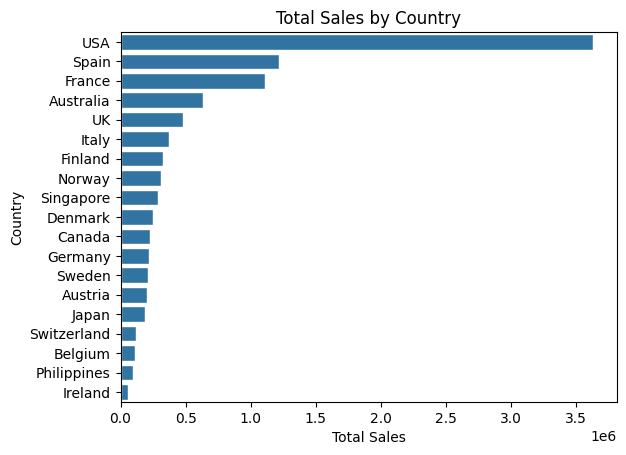

In [29]:
country_sales = sales.groupby('Country')['Sales'].sum().reset_index()
country_sales_sorted = country_sales.sort_values(by='Sales', ascending=False)
sns.barplot(y='Country', x='Sales', data=country_sales_sorted, edgecolor='white')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

Text(0.5, 1.0, 'Top 5 Countries in Average Profit')

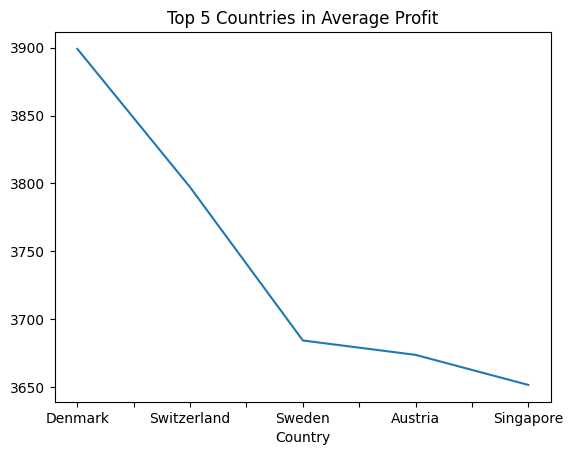

In [30]:
agg = sales.groupby('Country')['Sales'].mean().sort_values(ascending=False)
agg.head(5).plot()
plt.title("Top 5 Countries in Average Profit")

Text(0.5, 1.0, 'Bottom 5 Countries in Average Profit')

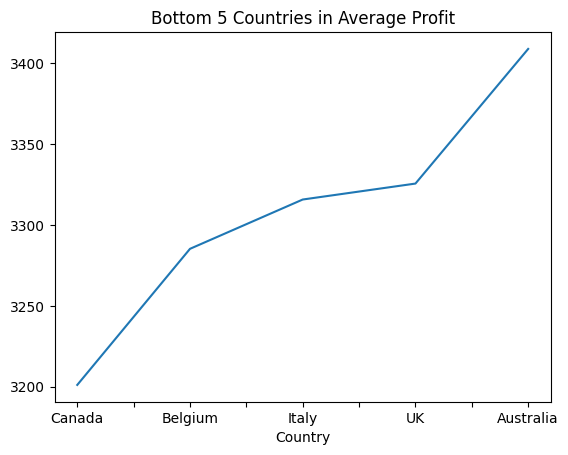

In [31]:
bot = sales.groupby('Country')['Sales'].mean().sort_values(ascending=True)

bot.head(5).plot()
plt.title("Bottom 5 Countries in Average Profit")

<ipython-input-33-cf3f0eadf84f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = product_line_revenue, x = 'Product_Line', y = 'Sales', palette='viridis')


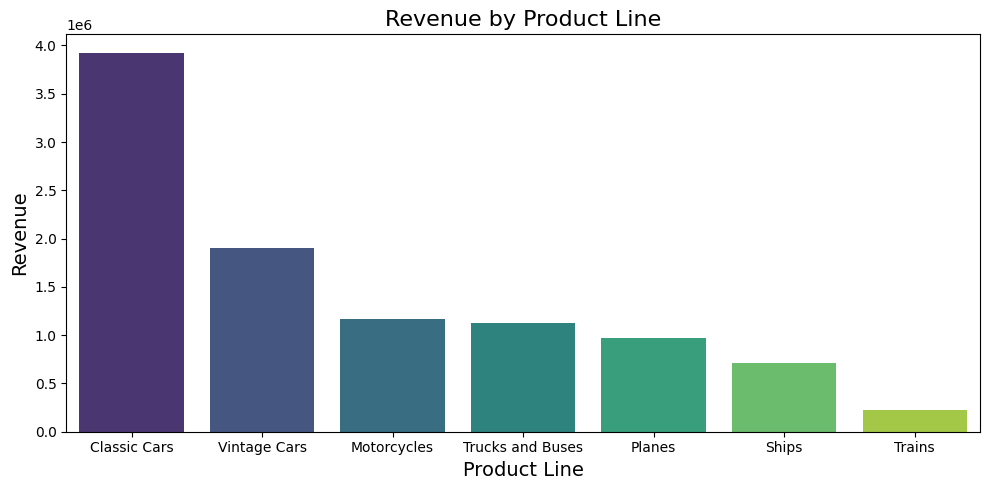

In [33]:
product_line_revenue = sales.groupby('Product_Line')['Sales'].sum().reset_index().sort_values(by ="Sales",ascending = False)


plt.figure(figsize = (10,5))
sns.barplot(data = product_line_revenue, x = 'Product_Line', y = 'Sales', palette='viridis')

plt.title('Revenue by Product Line', fontsize =16)
plt.xlabel('Product Line', fontsize = 14)
plt.ylabel('Revenue', fontsize =14)

plt.tight_layout()
plt.show()

<ipython-input-35-99800b620655>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sales', x='Year_ID', data=year_sales_sorted, edgecolor='black', palette='RdBu')


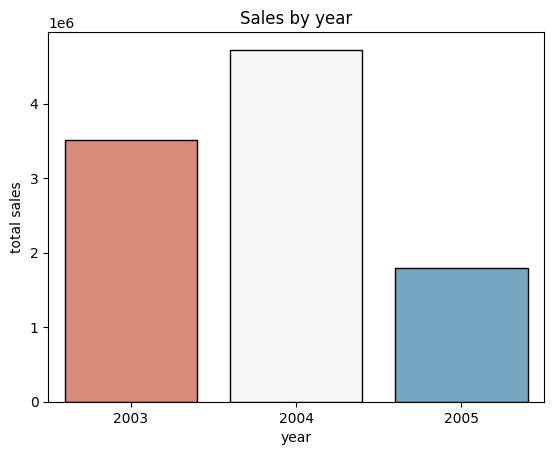

In [35]:
year_sales = sales.groupby('Year_ID')['Sales'].sum().reset_index()
year_sales_sorted = year_sales.sort_values(by='Sales', ascending=False)

sns.barplot(y='Sales', x='Year_ID', data=year_sales_sorted, edgecolor='black', palette='RdBu')
plt.title('Sales by year')
plt.xlabel('year')
plt.ylabel('total sales')
plt.show()

**Bar plot of sales over year and quarter**

Text(0.5, 1.0, 'Bar plot of sales over year and quarter')

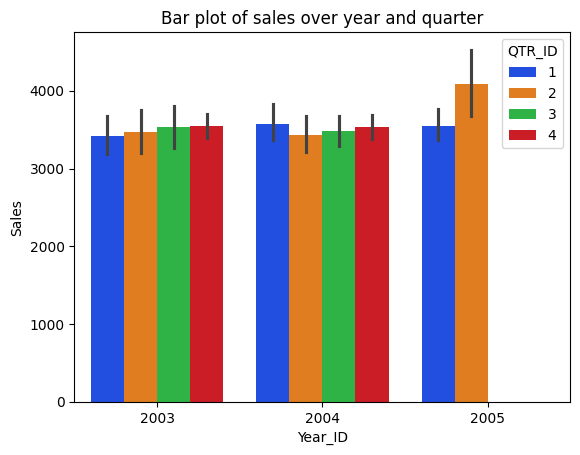

In [36]:
sns.barplot(x='Year_ID', y='Sales', hue='QTR_ID', data=sales , palette='bright')
plt.title("Bar plot of sales over year and quarter")

Text(0.5, 1.0, 'Sales vs Month')

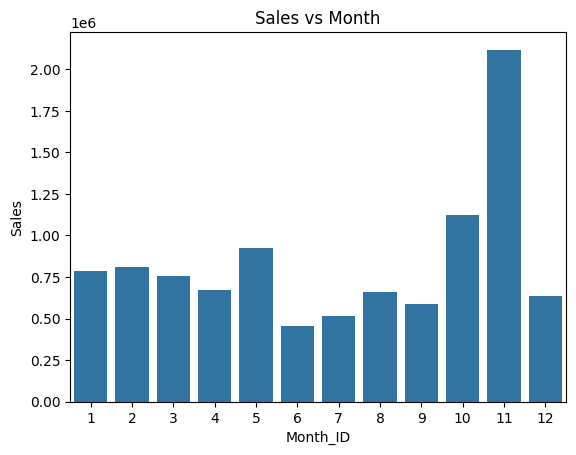

In [37]:
mo_sal= sales.groupby('Month_ID')['Sales'].sum().reset_index()
mo_sal.head()
sns.barplot(data=mo_sal, y='Sales', x='Month_ID')
plt.title('Sales vs Month')

**PRODUCTS SOLD ACCORDING TO QUARTER**

In [39]:
quarter = sales.groupby(['Product_Line']).QTR_ID.value_counts().reset_index(name='COUNTS')
quarter

,Product_Line,QTR_ID,COUNTS
0,Classic Cars,4,392
1,Classic Cars,1,217
2,Classic Cars,3,183
3,Classic Cars,2,175
4,Motorcycles,4,117
5,Motorcycles,1,76
6,Motorcycles,2,74
7,Motorcycles,3,64
8,Planes,4,106
9,Planes,2,80


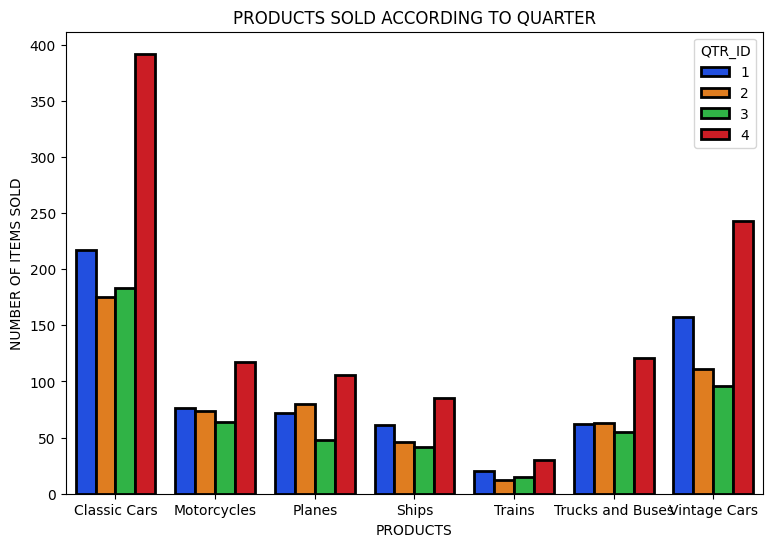

In [40]:
plt.figure(figsize=(9,6))

kwargs  =   {'edgecolor':"black", 'linewidth':2}

sns.barplot(x='Product_Line',y='COUNTS',data=quarter,hue='QTR_ID',palette='bright',**kwargs)
sns.set_style('whitegrid')

plt.title("PRODUCTS SOLD ACCORDING TO QUARTER")
plt.xlabel('PRODUCTS')
plt.ylabel('NUMBER OF ITEMS SOLD')
plt.show()

**Deal Size ACCORDING TO QUARTER**

In [41]:
quarter_DZ = sales.groupby(['Deal_Size']).QTR_ID.value_counts().reset_index(name='COUNTS')
quarter_DZ


,Deal_Size,QTR_ID,COUNTS
0,Large,4,52
1,Large,2,47
2,Large,1,32
3,Large,3,26
4,Medium,4,549
5,Medium,1,338
6,Medium,2,260
7,Medium,3,237
8,Small,4,493
9,Small,1,295


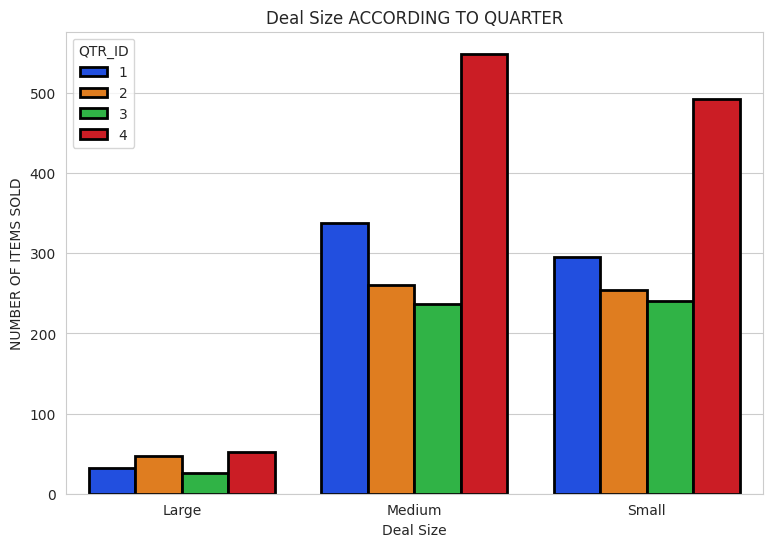

In [42]:
plt.figure(figsize=(9,6))

kwargs  =   {'edgecolor':"black", 'linewidth':2}

sns.barplot(x='Deal_Size',y='COUNTS',data=quarter_DZ,hue='QTR_ID',palette='bright',**kwargs)
sns.set_style('whitegrid')

plt.title("Deal Size ACCORDING TO QUARTER")
plt.xlabel('Deal Size')
plt.ylabel('NUMBER OF ITEMS SOLD')
plt.show()

**Total Revenue by Deal Size and Product Line**


How does the deal size affect revenue?

In [43]:
sales_by_deal_size = sales.groupby(['Product_Line','Deal_Size'])['Sales'].agg(['mean','sum','count']).reset_index().sort_values(by ="sum",ascending = False)

sales_by_deal_size.rename(columns={'mean':'Avg Revenue','sum':'Total Revenue','count':'Orders'},inplace= True)

sales_by_deal_size

,Product_Line,Deal_Size,Avg Revenue,Total Revenue,Orders
1,Classic Cars,Medium,4585.393189,2430258.39,530
18,Vintage Cars,Medium,4159.156935,1085539.96,261
15,Trucks and Buses,Medium,4668.729600,817027.68,175
0,Classic Cars,Large,8212.801959,796641.79,97
2,Classic Cars,Small,2037.398471,692715.48,340
4,Motorcycles,Medium,4361.344167,680369.69,156
19,Vintage Cars,Small,1889.884565,608542.83,322
7,Planes,Medium,4175.240698,538606.05,129
9,Ships,Medium,3950.795047,422735.07,107
8,Planes,Small,2168.844167,364365.82,168


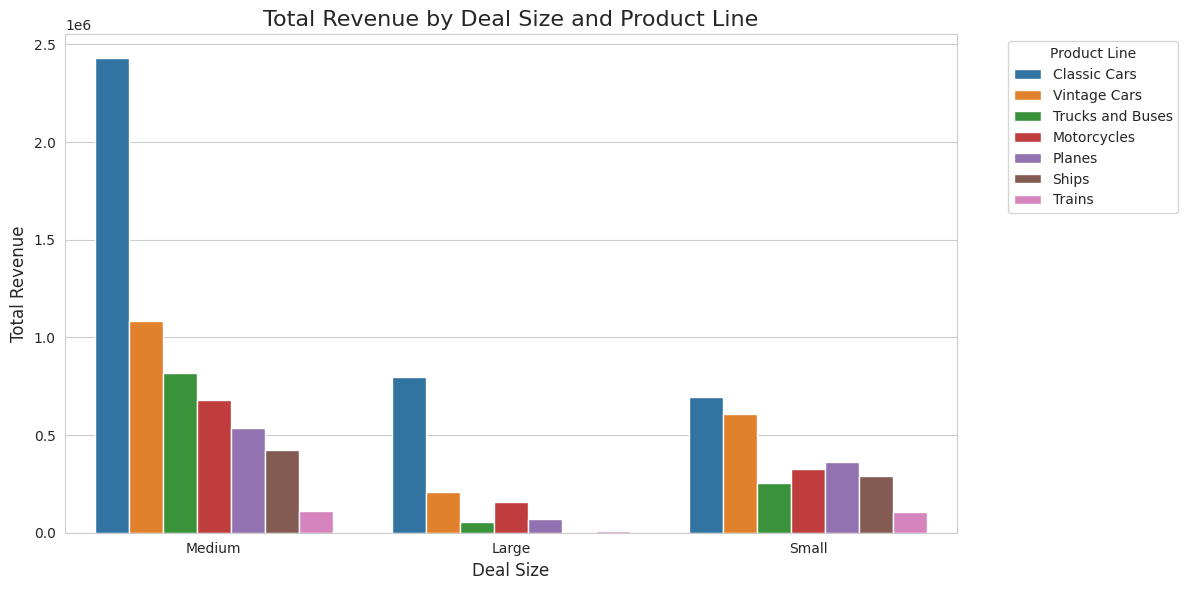

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_deal_size,x='Deal_Size',y='Total Revenue',hue='Product_Line',palette='tab10')
plt.title('Total Revenue by Deal Size and Product Line', fontsize=16)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

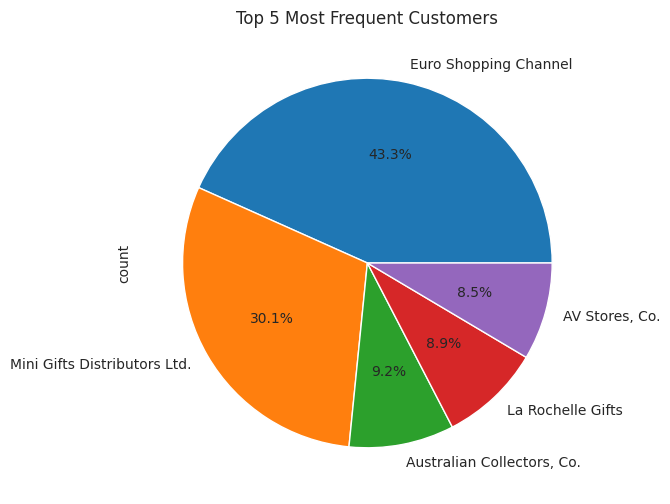

In [45]:
top_5_customers = sales['Customer_Name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_5_customers.plot(kind='pie' ,autopct='%1.1f%%')
plt.title('Top 5 Most Frequent Customers')
plt.show()

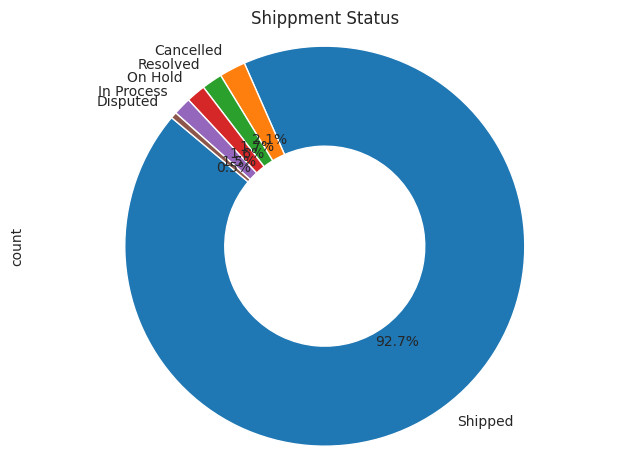

In [46]:
ship=sales['Status'].value_counts()
ship.plot(kind='pie', autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.5))
plt.title('Shippment Status')
plt.axis('equal')
plt.tight_layout()
plt.show()

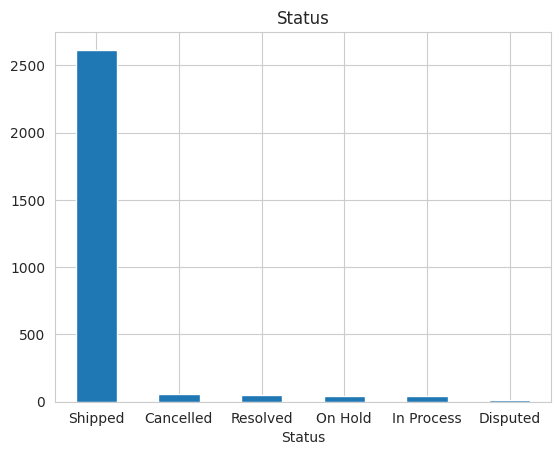

In [47]:
stat=sales['Status'].value_counts()
stat.plot(kind='bar' , rot=0)
plt.title('Status')
plt.show()

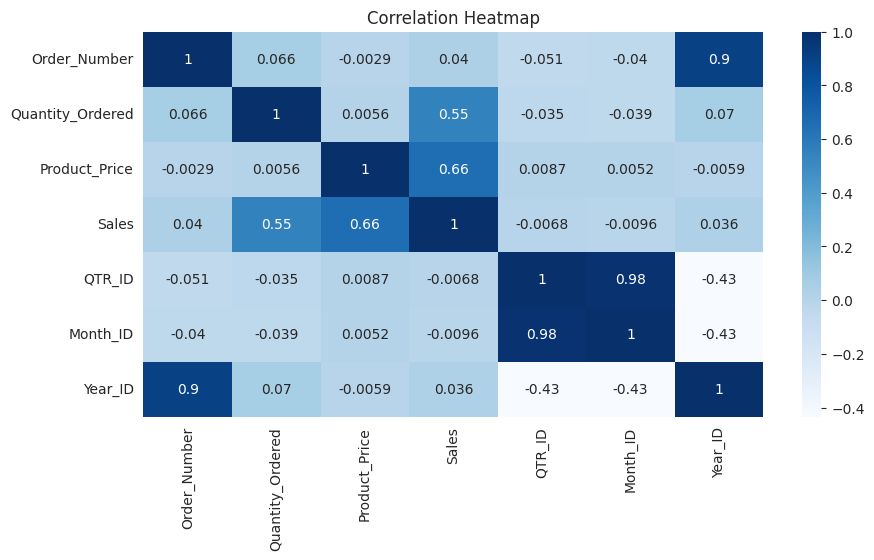

In [48]:
# Select only numerical features for correlation analysis
numerical_features = sales.select_dtypes(include=np.number).columns
numerical_sales = sales[numerical_features]

plt.figure(figsize=(10, 5))
sns.heatmap(numerical_sales.corr(), cmap='Blues', annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
pd.to_csv("sales1.csv")